# Camera Calculations

This part of the code will generate the pickle files for computing camera distortion matrices using a set of chessboard images. We will use functionality from OpenCV to undistort the images and calibrate our camera.

I took these photos using a GoPro camera with the same settings and lenses as the actual road data recordings. Normally upto 20 images are used to calculate the distortion coefficients of the camera.

![image](./readme_images/chessboard.jpg)

### Import all necessary libraries

Here we import the necessart libraries required for this part of the code.

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import natsort
import pickle
import pprint

# print version details
print("----- Python version -----")
print(sys.version)
print()
print("----- OpenCV version ----- ")
print(cv2.__version__)

----- Python version -----
3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

----- OpenCV version ----- 
4.2.0


## Visualize Data

Here we wil visualize a couple of our chessboard images. As we can see from the images, the images are captured using a wide angle lens and hence there is severe distortion applied to the image. This is known as Fish Eye effect.

Text(0.5, 1.0, 'Sample Image 2')

<Figure size 432x288 with 0 Axes>

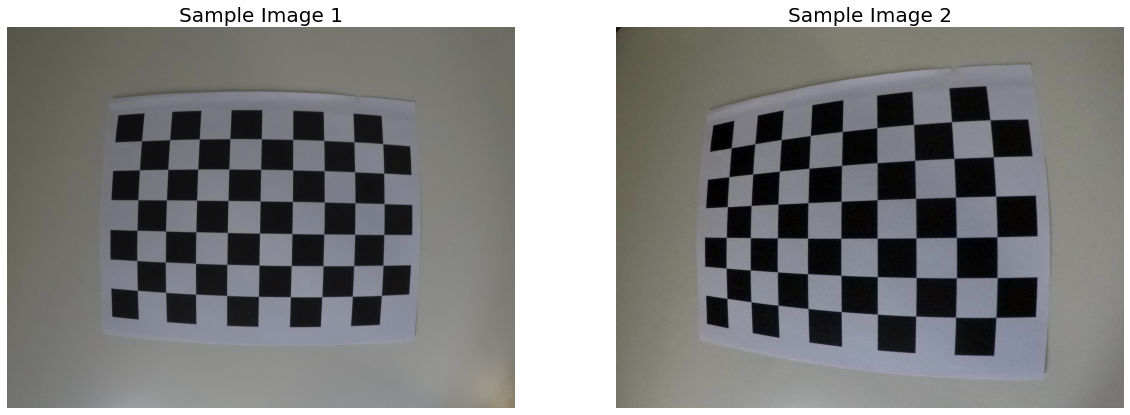

In [2]:
# image directory for chessboard images

image1 = mpimg.imread("./camera_cal/calibration8.jpg")
image2 = mpimg.imread("./camera_cal/calibration3.jpg")

plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.axis("off")
ax1.imshow(image1)
ax1.set_title('Sample Image 1', fontsize=20)
ax2.axis("off")
ax2.imshow(image2)
ax2.set_title('Sample Image 2', fontsize=20)


## Finding Corners

In this exercise, you'll use the OpenCV functions findChessboardCorners() and drawChessboardCorners() to automatically find and draw corners in an image of a chessboard pattern.

To learn more about both of those functions, you can have a look at the OpenCV documentation here: [cv2.findChessboardCorners()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#findchessboardcorners) and [cv2.drawChessboardCorners()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#drawchessboardcorners).

We will draw chessboard corners for the two images displayed above for demonstration.

Text(0.5, 1.0, 'Image 2 with corners')

<Figure size 432x288 with 0 Axes>

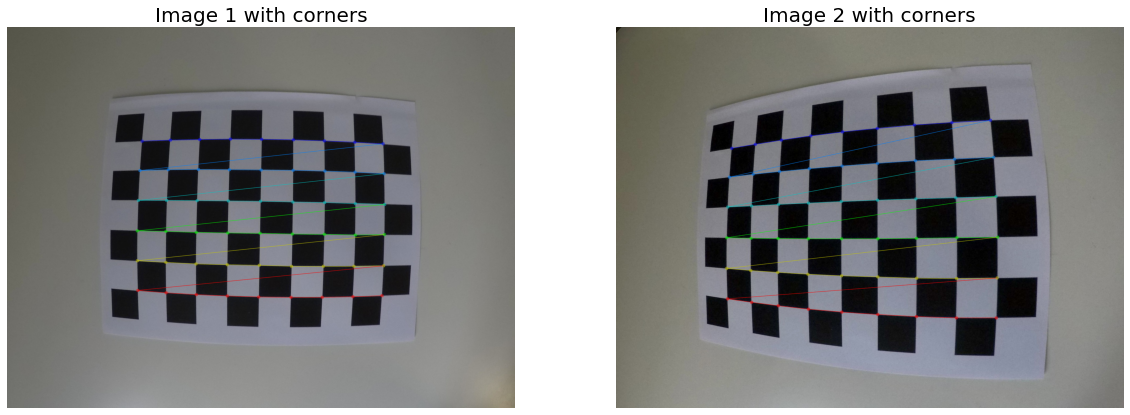

In [3]:
# set the number of chessboard corners
nx = 9
ny = 6

ret1, corners1 = cv2.findChessboardCorners(image1, (nx, ny), None)
ret2, corners2 = cv2.findChessboardCorners(image2, (nx, ny), None)

if (ret1):
    img_corners1 = cv2.drawChessboardCorners(image1, (nx, ny), corners1, ret1)
if (ret2):
    img_corners2 = cv2.drawChessboardCorners(image2, (nx, ny), corners2, ret2)
    
plt.figure(2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.axis("off")
ax1.imshow(img_corners1)
ax1.set_title('Image 1 with corners', fontsize=20)
ax2.axis("off")
ax2.imshow(img_corners2)
ax2.set_title('Image 2 with corners', fontsize=20)


## Calibrate Camera Function

There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions cv2.calibrateCamera() and cv2.undistort() to compute the calibration and undistortion.

Here are the two functions we will be using for calibrating our camera:

**ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)**

Undistorting a test image:

**dst = cv2.undistort(img, mtx, dist, None, mtx)**

In [4]:
def calibrate_camera(nx, ny):
    # function to find and draw chessboard corners and undistort chessboard images after inputting the x and y corners

    # get the list of images
    images = glob.glob('camera_cal/calibration*.jpg')

    # sorting the images based on ids
    images = natsort.natsorted(images)
    # images = glob.glob('test_images/test*.jpg')

    # creating arrays to store object and image points from all the images
    objpoints = []      # 3D object points in real space
    imgpoints = []      # 2D points in image space

    # prepare object points
    objp = np.zeros((ny*nx, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)    # x, y cor-ordinates

    # iterate through the images
    for fname in images:

        # read file
        img = cv2.imread(fname)

        # grab the filenames and extensions for saving result files later
        filename_w_ext = os.path.basename(fname)
        filename, file_extension = os.path.splitext(filename_w_ext)

        # convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        # print(ret)
        
        # img_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

        # If found, we will get image coordinates
        if (ret):
            # add the corners and objectpoints to our lists
            imgpoints.append(corners)
            objpoints.append(objp)
            
            # uncomment this section to run on all chessboard images
            
            # After saving the drawn chessboard corners on camera images, comment out this section...            
            # draw and display the corners
            img_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            # cv2.imshow('img',img_corners)
            # cv2.waitKey(0)

            # save the drawn chessboard corners
            # mpimg.imsave(('camera_cal_outputs/'+filename+'-corners'+file_extension), img_corners)
            cv2.imwrite(('camera_cal_outputs/'+filename+'-corners'+file_extension), img_corners)

            # calculate and save undistorted images
            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
            undist = cv2.undistort(img, mtx, dist, None, mtx)
            cv2.imwrite(('camera_cal_outputs/'+filename+'-undistorted'+file_extension), undist)
            
            
            
    # sample one image for undistortion demo
    # Here, will use calibration3.jpg image for perspective transform since it shows
    # all the corners in the image and relatively easy to specify dst points
    
    img = cv2.imread('camera_cal/calibration8.jpg')
    img_size = (img.shape[1], img.shape[0])

    # camera calibration after giving object points and image points

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    # cv2.imwrite('camera_cal_outputs/undist_calibration8.jpg',dst)
    
    # Save the camera calibration result for use later on
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump(dist_pickle, open("pickle/dist_pickle.p", "wb" ))
    
    return mtx, dist

### Running the Camera Calibration

Here, we will run our camera calibration function. This function performs camera calibration, and saves the undistorted images along with drawn chessboard corners images.

Now, we will call Calibrate Camera and Unwarp Corners functions:

(Note: In the camera calibrate function, I have included code that iterates through all the calibration images to draw detected chessboard corners and save the output images. After running once and the images have been saved, the following lines can be commented out.

```python
cv2.imwrite(('camera_cal_outputs/chessboard_corners/'+filename+'-corners'+file_extension), img_corners)
cv2.imwrite(('camera_cal_outputs/undistorted_chessboard_corners/'+filename+'-undistorted'+file_extension), undist)
```

In [5]:
# function call to run camera calibration
mtx, dst = calibrate_camera(9, 6)

### Print Pickle data

We will print the pickle data to verify that the pickle data has been saved.

In [6]:
file = open('pickle/dist_pickle.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the saved pickled data:')
print()

mtx_val, dst_val = data.values()

print("mtx = ", mtx_val)
print()
print("dst = ", dst_val)


Showing the saved pickled data:

mtx =  [[1.11976774e+03 0.00000000e+00 9.64549015e+02]
 [0.00000000e+00 1.11133051e+03 7.25644361e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

dst =  [[-0.26776597  0.11511928 -0.0013741  -0.00063393 -0.02582954]]
